In [1]:
import os

In [2]:
files = os.listdir('data/')
files

['b19416acd7a4a1e9391f17095a0bbc7e_export.csv']

In [3]:
import pandas
import numpy as np

# Eletricity Data

In [4]:
df = pandas.read_csv(os.path.join('data', files[0]))

df

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),備轉容量率(%),工業用電(百萬度),民生用電(百萬度),核一#1(萬瓩),核一#2(萬瓩),核二#1(萬瓩),...,大觀二,明潭,碧海,立霧,龍澗,卓蘭,水里,其他小水力,風力發電,太陽能發電
0,20190101,26429,23872,2557.0,10.71,279.870,192.192,0,0,98.4,...,16.0,54.0,0.0,1.2,3.0,2.2,0.0,24.3,50.9,0.0
1,20190102,30047,28148,1899.0,6.75,323.080,221.864,0,0,98.5,...,29.9,52.3,0.0,1.2,2.0,2.1,0.0,23.4,37.9,0.0
2,20190103,30343,28452,1891.0,6.65,336.597,231.146,0,0,98.7,...,14.3,65.5,0.0,1.4,1.2,2.0,0.1,24.1,41.6,0.0
3,20190104,30301,28490,1811.0,6.36,339.020,232.810,0,0,98.7,...,18.1,52.3,0.0,1.4,1.4,0.0,0.0,19.3,12.4,11.0
4,20190105,27957,26054,1903.0,7.30,315.825,216.882,0,0,98.7,...,30.4,57.6,0.0,1.3,3.0,2.9,0.0,23.9,18.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,20201027,35071,31669,3402.0,10.74,362.462,309.405,0,0,98.1,...,43.5,63.8,4.8,1.4,1.9,1.7,0.8,13.9,34.6,41.5
666,20201028,35429,31959,3470.0,10.86,365.469,311.972,0,0,98.0,...,14.4,48.0,4.0,1.2,1.4,0.0,0.5,13.7,58.8,161.6
667,20201029,34978,31271,3707.0,11.86,362.440,309.387,0,0,97.8,...,20.5,50.0,1.0,1.2,1.3,0.0,0.5,16.2,60.8,143.3
668,20201030,34479,30264,4215.0,13.93,351.492,300.041,0,0,97.8,...,12.1,32.3,2.0,1.2,1.5,0.0,0.5,16.5,60.1,207.5


In [5]:
df.columns

Index(['日期', '淨尖峰供電能力(MW)', '尖峰負載(MW)', '備轉容量(MW)', '備轉容量率(%)', '工業用電(百萬度)',
       '民生用電(百萬度)', '核一#1(萬瓩)', '核一#2(萬瓩)', '核二#1(萬瓩)', '核二#2(萬瓩)', '核三#1',
       '核三#2', '林口#1', '林口#2', '林口#3', '台中#1', '台中#2', '台中#3', '台中#4', '台中#5',
       '台中#6', '台中#7', '台中#8', '台中#9', '台中#10', '興達#1', '興達#2', '興達#3', '興達#4',
       '大林#1', '大林#2', '和平#1', '和平#2', '麥寮#1', '麥寮#2', '麥寮#3', '汽電共生',
       '大潭 (#1-#6)', '通霄 (#1-#6)', '興達 (#1-#5)', '南部 (#1-#4)', '大林(#5-#6)',
       '海湖 (#1-#2)', '國光 #1', '新桃#1', '星彰#1', '星元#1', '嘉惠#1', '豐德(#1-#2)',
       '協和 (#1-#4)', '氣渦輪', '離島', '德基', '青山', '谷關', '天輪', '馬鞍', '萬大', '大觀',
       '鉅工', '大觀二', '明潭', '碧海', '立霧', '龍澗', '卓蘭', '水里', '其他小水力', '風力發電',
       '太陽能發電'],
      dtype='object')

In [6]:
len(df.columns)

71

In [7]:
#fill the NaN value with mean
from sklearn.impute import SimpleImputer
import numpy as np

ipt = SimpleImputer(missing_values=np.NaN, strategy='mean')
df = pandas.DataFrame(ipt.fit_transform(df),columns=df.columns)

# Mask training data

In [8]:
time_series_data = np.array(df['備轉容量(MW)'])

In [9]:
time_series_data.shape

(670,)

## plot time series

In [11]:
import matplotlib.pyplot as plt

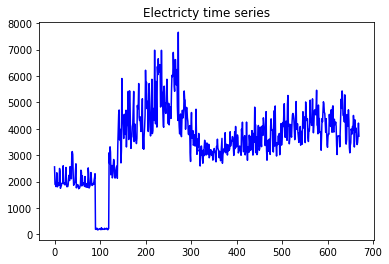

In [149]:
x = np.arange( time_series_data.shape[0])
plt.plot(x, time_series_data, 'b')
plt.title('Electricty time series')
plt.show()

## train test split

In [26]:
train_x = time_series_data[:-200]
test_y = time_series_data[-200:]

train_y = train_x[-7:]
train_x = train_x[:-7]

In [28]:
print('train_x shape:{}\ntrain_y shape:{}\ntest_y shape:{}\n'.format(train_x.shape, train_y.shape, test_y.shape))

train_x shape:(463,)
train_y shape:(7,)
test_y shape:(200,)



# Model

In [31]:
import torch
import torch.nn as nn

In [32]:
class LinearModel(nn.Module):
    def __init__(self, time_series_len, predict_days):
        super(LinearModel,self).__init__()
        
        self.fc0 = nn.Linear(time_series_len, 128)
        self.fc1 = nn.Linear(128, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc = nn.Linear(128, predict_days)
        self.flatten = nn.Flatten()
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
#         x = x.squeeze()
        x = self.fc0(x)
        x = self.relu(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc(x)
        
        return x

In [47]:
class GruModel(nn.Module):
    def __init__(self, batch, predict_days, hidden_size=20, num_layers=3, batch_first=True):
        super(GruModel,self).__init__()
        
        self.rnn = nn.GRU(1, hidden_size, num_layers, batch_first=batch_first)
        self.h0 = torch.randn(num_layers, batch, hidden_size, requires_grad=True)
        if torch.cuda.is_available():
            self.h0 = self.h0.cuda()
        
        self.fc1 = nn.Linear(hidden_size, 512)
        self.fc2 = nn.Linear(512, 1024)
        self.fc3 = nn.Linear(1024, 128)
        self.fc4 = nn.Linear(128, predict_days)
        self.fc = nn.Linear(hidden_size, predict_days)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.01)
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        output, hn = self.rnn(x, self.h0)
        x = self.flatten(output[:, -1])
        
        x = self.relu(x)
#         x = self.fc(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
#         x = torch.sigmoid(x)
        
        return x

In [48]:
gru = GruModel(batch=1, predict_days=7, num_layers=10)
linear = LinearModel(time_series_len=len(train_x), predict_days=len(train_y))

In [49]:
x = torch.tensor(train_x, dtype=torch.float).unsqueeze(dim=0)
y = torch.tensor(train_y, dtype=torch.float).unsqueeze(dim=0)

In [50]:
gru.cuda()
linear.cuda()

LinearModel(
  (fc0): Linear(in_features=463, out_features=128, bias=True)
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=7, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
)

In [51]:
gru(x.unsqueeze(dim=-1).cuda())

tensor([[ 0.0565,  0.0884,  0.0654, -0.0397,  0.0343, -0.0162, -0.0763]],
       device='cuda:0', grad_fn=<AddmmBackward>)

In [52]:
linear(x.cuda())

tensor([[  89.7760,  118.7679, -262.4665,   50.2965,    0.2977,   65.5568,
          -71.5674]], device='cuda:0', grad_fn=<AddmmBackward>)

# Training

In [72]:
loss = torch.nn.MSELoss(reduction='mean')

In [73]:
gru = GruModel(batch=1, predict_days=7, num_layers=10)
linear = LinearModel(time_series_len=len(train_x), predict_days=len(train_y))
gru.cuda()
linear.cuda()

LinearModel(
  (fc0): Linear(in_features=463, out_features=128, bias=True)
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=7, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
)

In [74]:
optimizer = torch.optim.Adam([
#     dict(params=linear.parameters(), lr=4e-4),
     dict(params=gru.parameters(), lr=4e-4),
])

In [75]:
from tqdm import tqdm 

In [76]:
# train model for N epochs
max_valid_score = 0
EPOCH = 1000
for epoch in range(EPOCH):

    torch.cuda.empty_cache()

    optimizer.zero_grad()     #optimizer gradient to zero

    # Get data
    x = torch.tensor(train_x, dtype=torch.float).unsqueeze(dim=0).cuda()
    y = torch.tensor(train_y, dtype=torch.float).unsqueeze(dim=0).cuda()

    # Train 

    ## 1. forward propagationreal_labels
    ## -----------------------

#         pred = linear(x)
    pred = gru(x.unsqueeze(dim=-1))

    ## 2. loss calculation
    ## -----------------------
    _loss = loss(pred, y)
    
    running_loss = _loss.item()
    
    if epoch %10 == 0:
        print("Epoch:", epoch, "Training Loss: {}".format(running_loss) )

    ## 3. backward propagation
    ## -----------------------
    _loss.backward()     

    ## 4. weight optimization
    ## -----------------------        
    optimizer.step()
    
    
    if running_loss < 10:
        print("Epoch:", epoch, "Training Loss: {}".format(running_loss) )
        break


#     if epoch %100 == 0:
#     print("Epoch:", epoch, "Training Loss: {}".format(total_loss) )



Epoch: 0 Training Loss: 12604955.0
Epoch: 10 Training Loss: 12602661.0
Epoch: 20 Training Loss: 12594118.0
Epoch: 30 Training Loss: 12563646.0
Epoch: 40 Training Loss: 12470539.0
Epoch: 50 Training Loss: 12225747.0
Epoch: 60 Training Loss: 11695033.0
Epoch: 70 Training Loss: 10640851.0
Epoch: 80 Training Loss: 8934181.0
Epoch: 90 Training Loss: 6355547.5
Epoch: 100 Training Loss: 3377909.75
Epoch: 110 Training Loss: 953274.5
Epoch: 120 Training Loss: 205452.296875
Epoch: 130 Training Loss: 201516.140625
Epoch: 140 Training Loss: 64510.3046875
Epoch: 150 Training Loss: 19070.2109375
Epoch: 160 Training Loss: 10018.90234375
Epoch: 170 Training Loss: 1456.687255859375
Epoch: 180 Training Loss: 1496.8563232421875
Epoch: 190 Training Loss: 812.4837036132812
Epoch: 200 Training Loss: 239.70826721191406
Epoch: 210 Training Loss: 347.7597351074219
Epoch: 216 Training Loss: 9.191774368286133


## try train arima

In [121]:
import pmdarima as pm

In [122]:
arima = pm.auto_arima(train_x, error_action='ignore', trace=False,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)

In [123]:
arima.predict(7)

array([4036.45247144, 4035.66354703, 4035.66354703, 4035.66354703,
       4035.66354703, 4035.66354703, 4035.66354703])

# eval

In [78]:
from torch.utils.data import Dataset as BaseDataset

In [79]:
class Dataset(BaseDataset):
    def __init__(
        self,
        train_data,
        apply_normalize = False,
    ):
        #prepare the training data and label
        self.train_label = np.array(train_data['備轉容量(MW)'])
        if not apply_normalize:
            self.train_data = np.array(train_data['備轉容量(MW)'])
#         else:
#            self.train_data = np.array(normalize(train_data['備轉容量(MW)'], axis=0))
    
    def __getitem__(self, i):
        x = self.train_data[:i]
        y = self.train_label[i:i+7]
        
        x = np.expand_dims(x, -1)
        
        return x, y
    
    def __len__(self):
        return len(self.train_data)

In [113]:
dataset = Dataset(df)

In [114]:
x,y = dataset[463]
x = torch.tensor(x, dtype=torch.float).unsqueeze(dim=0).cuda()
y = torch.tensor(y, dtype=torch.float).unsqueeze(dim=0).cuda()

In [115]:
print(x.shape, y.shape)

torch.Size([1, 463, 1]) torch.Size([1, 7])


## calculate loss

In [116]:
loss(gru(x), y)

tensor(302.4503, device='cuda:0', grad_fn=<MseLossBackward>)

In [117]:
loss(torch.tensor(arima.predict(7), dtype=torch.float).unsqueeze(dim=0).cuda(), y)

tensor(560042.8125, device='cuda:0')

## draw  fitting line

## predict with gru

In [140]:
preds = []

for i in tqdm(range(200)):
    x, y = dataset[463+i]
    x = torch.tensor(x, dtype=torch.float).unsqueeze(dim=0).cuda()
    y = torch.tensor(y, dtype=torch.float).unsqueeze(dim=0).cuda()
    pred = gru(x)
    
    preds.append(pred.detach().cpu().numpy()[0, -1])

100%|██████████| 200/200 [00:07<00:00, 27.68it/s]


In [142]:
gru_preds = np.array(preds)
gru_preds.shape

(200,)

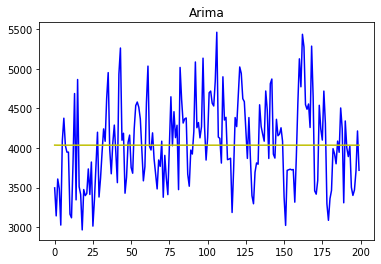

In [147]:
x = np.arange( time_series_data[-200:].shape[0])
plt.plot(x, time_series_data[-200:], 'b')
plt.plot(x, arima.predict(200), 'y')
plt.title('Arima')
plt.show()

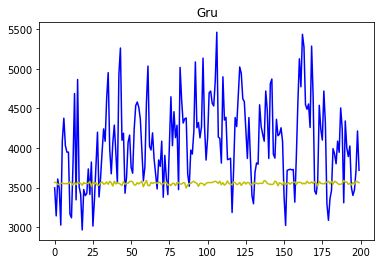

In [145]:
x = np.arange( time_series_data[-200:].shape[0])
plt.plot(x, time_series_data[-200:], 'b')
plt.plot(x, gru_preds, 'y')
plt.title('Gru')
plt.show()

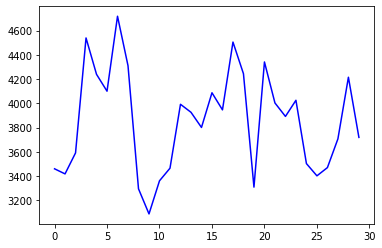

In [151]:
x = np.arange( time_series_data[-30:].shape[0])
plt.plot(x, time_series_data[-30:], 'b')
plt.show()